Датасет по кредитным картам:
https://www.kaggle.com/datasets/arjunbhasin2013/ccdata?datasetId=14701&sortBy=voteCount

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv("CC GENERAL.csv")
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


Берём колонки: частота покупок, баланс, аванс наличными. Очищаем данные от пропусков.

In [3]:
cols = ["PURCHASES_FREQUENCY", "BALANCE", "CASH_ADVANCE"]
X = df[cols].fillna(0)
X.head()

,PURCHASES_FREQUENCY,BALANCE,CASH_ADVANCE
0,0.166667,40.900749,0.000000
1,0.000000,3202.467416,6442.945483
2,1.000000,2495.148862,0.000000
3,0.083333,1666.670542,205.788017
4,0.083333,817.714335,0.000000


Количество строк и столбцов:

In [4]:
X.shape

(8950, 3)

Строим диаграммы рассения с разным количество кластеров, точки одного цвета - близкие по заданным характеристикам:

In [5]:
kluster_number = 6
sse = []

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

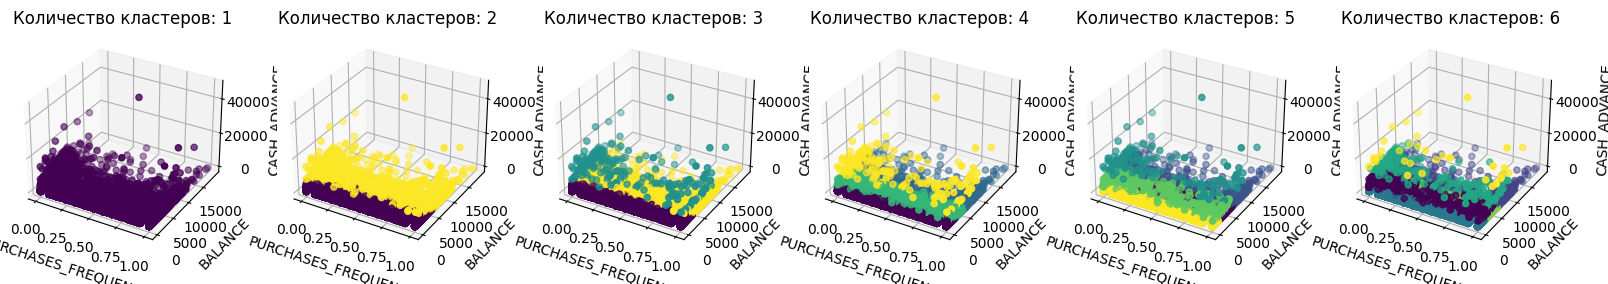

In [10]:
fig, axs = plt.subplots(1, kluster_number, figsize=(20, 40), subplot_kw={'projection': '3d'})
for k in range(kluster_number):
    kmeans = KMeans(1+k)
    X["cluster"] = kmeans.fit_predict(X)
    sse.append(kmeans.inertia_)
    axs[k].scatter3D(X[cols[0]], X[cols[1]], X[cols[2]], c=X["cluster"])
    axs[k].set_title(f"Количество кластеров: {1+k}")
    axs[k].set_xlabel(cols[0])
    axs[k].set_ylabel(cols[1])
    axs[k].set_zlabel(cols[2])

График характерной зависимости ошибки E отнесения экземпляра к определенному классу от номера итерации i метода k-means и количества кластеров k:

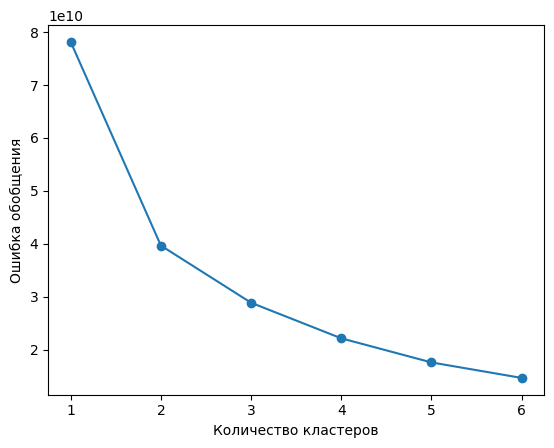

In [11]:
plt.plot(range(1,kluster_number+1), sse, marker='o')
plt.xlabel('Количество кластеров')
plt.ylabel('Ошибка обобщения')
plt.show()